# Linguistic and Cognitive Foundations Tutorial

## Overview
This Jupyter Notebook is a comprehensive, beginner-friendly tutorial for aspiring scientists and researchers. It covers **Grammar (Dependency and Constituency)**, **Discourse (RST and Centering)**, **Pragmatics (Anaphora and Coherence)**, and **Cognitive Constraints in Generation**, with practical code, visualizations, theory, research directions, rare insights, applications, and projects. Additional topics like evaluation metrics and cognitive modeling are included to ensure a complete foundation for your scientific career.

### Objectives
- Understand linguistic and cognitive principles for NLP and cognitive science.
- Implement practical code using Python libraries (`spaCy`, `nltk`, `matplotlib`).
- Explore research directions and real-world applications.
- Complete mini and major projects to build your research portfolio.

### Prerequisites
- Basic Python knowledge (install `spaCy`, `nltk`, `matplotlib`).
- No prior linguistics experience required.

### Setup
Run the following to install required libraries:
```bash
pip install spacy nltk matplotlib
python -m spacy download en_core_web_sm
```

## Table of Contents
1. Grammar: Dependency and Constituency
2. Discourse: RST and Centering
3. Pragmatics: Anaphora and Coherence
4. Cognitive Constraints in Generation
5. Additional Topics for Scientists
6. Mini Projects
7. Major Project: Coherence-Aware Text Generator
8. Research Directions and Rare Insights
9. Applications

Let's dive in!

## 1. Grammar: Dependency and Constituency

### Theory
**Grammar** defines how words form sentences. Two approaches:
- **Dependency Grammar**: Focuses on word-to-word relationships, with the verb as the root. *Analogy*: A mobile with the verb as the main hook and words as ornaments.
- **Constituency Grammar**: Breaks sentences into nested phrases (e.g., NP, VP). *Analogy*: A family tree with the sentence as the ancestor.

### Code: Dependency Parsing with spaCy
Parse a sentence and visualize its dependency tree.

In [4]:
# If running in a new environment, install prerequisites by running the following in a cell:
# !pip install spacy nltk matplotlib
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 2.4 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 2.3 MB/s eta 0:00:06
     ---- ----------------------------------- 1.6/12.8 MB 2.3 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/12.8 MB 2.3 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/12.8 MB 2.3 MB/s eta 0:00:05
     ------ --------------------------------- 2.1/12.8 MB 1.5 MB/s eta 0:00:08
     -------- ------------------------------- 2.6/12.8 MB 1.6 MB/s eta 0:00:07
     --------- ------------------------------ 2.9/12.8 MB 1.6 MB/s eta 0:00:07
     --------- ------------------------------ 2.9/12.8 MB 1.6 MB/s eta 0:00:07
     --------- ------------------------------ 2.9/12.8 MB 1.6 MB/s eta 0:00:07
     --------- ------------------------------ 3.1/12.8 MB 1.3 MB/s

In [5]:
import spacy
from spacy import displacy

# Load English model
nlp = spacy.load('en_core_web_sm')

# Example sentence
sentence = 'The quick dog chased the small cat.'
doc = nlp(sentence)

# Print dependencies
for token in doc:
    print(f'{token.text} --> {token.dep_} --> {token.head.text}')

# Visualize dependency tree
displacy.render(doc, style='dep', jupyter=True)

The --> det --> dog
quick --> amod --> dog
dog --> nsubj --> chased
chased --> ROOT --> chased
the --> det --> cat
small --> amod --> cat
cat --> dobj --> chased
. --> punct --> chased


ImportError: cannot import name 'display' from 'IPython.core.display' (c:\Users\Rishu\anaconda3\envs\temp_env\Lib\site-packages\IPython\core\display.py)

**Output Explanation**:
- `nsubj`: Nominal subject (e.g., 'dog' → 'chased').
- `dobj`: Direct object (e.g., 'cat' → 'chased').
- The visualization shows a tree with 'chased' as the root.

### Code: Constituency Parsing with NLTK
Parse a sentence into a constituency tree.

In [2]:
import nltk
from nltk import CFG, ChartParser

# Define a simple CFG
grammar = CFG.fromstring('''
    S -> NP VP
    NP -> Det Adj N | Det N
    VP -> V NP
    Det -> 'The' | 'the'
    Adj -> 'quick' | 'small'
    N -> 'dog' | 'cat'
    V -> 'chased'
''')

# Parse sentence
sentence = 'The quick dog chased the small cat'.split()
parser = ChartParser(grammar)
for tree in parser.parse(sentence):
    print(tree)
    tree.pretty_print()

(S
  (NP (Det The) (Adj quick) (N dog))
  (VP (V chased) (NP (Det the) (Adj small) (N cat))))
                S                     
       _________|_________             
      |                   VP          
      |          _________|____        
      NP        |              NP     
  ____|____     |      ________|____   
Det  Adj   N    V    Det      Adj   N 
 |    |    |    |     |        |    |  
The quick dog chased the     small cat



**Output Explanation**:
- Tree: `(S (NP (Det The) (Adj quick) (N dog)) (VP (V chased) (NP (Det the) (Adj small) (N cat))))`.
- Shows hierarchical phrases (S, NP, VP).

### Applications
- **Machine Translation**: Dependency parsing ensures accurate word alignment (e.g., Google Translate).
- **Grammar Checkers**: Constituency parsing validates phrase structures (e.g., Grammarly).

### Evaluation Metrics (Additional Topic)
- **Dependency Parsing**: Unlabeled Attachment Score (UAS) measures correct head assignments.
- **Constituency Parsing**: Parseval F1 score compares predicted and gold-standard trees.

**Example Calculation**:
- UAS = (Correct head assignments) / (Total dependencies).
- For 'The dog chased the cat' (4 dependencies), if 3 are correct, UAS = 3/4 = 0.75.

## 2. Discourse: RST and Centering

### Theory
**Discourse** studies how sentences form coherent texts.
- **RST**: Organizes text into trees with rhetorical relations (e.g., Cause). *Analogy*: A recipe with main instructions (nucleus) and supporting steps (satellite).
- **Centering**: Tracks entity focus for coherence. *Analogy*: A spotlight following the main character.

### Code: Simulating RST Analysis
Manually annotate relations (RST parsers are complex; this is a simplified approach).

In [6]:
# Simulate RST by defining relations
text = ['I missed the bus.', 'I was late for work.']
rst_relation = {'relation': 'Cause', 'nucleus': text[1], 'satellite': text[0]}

print(f'Relation: {rst_relation["relation"]}')
print(f'Nucleus: {rst_relation["nucleus"]}')
print(f'Satellite: {rst_relation["satellite"]}')

Relation: Cause
Nucleus: I was late for work.
Satellite: I missed the bus.


**Output**:
- Relation: Cause
- Nucleus: I was late for work.
- Satellite: I missed the bus.

### Code: Centering Analysis
Track entity focus across sentences.

In [7]:
def centering_analysis(sentences):
    for i, sent in enumerate(sentences):
        entities = sent.split()  # Simplified entity extraction
        cf = [e for e in entities if e in ['John', 'dog', 'him']]
        cb = None if i == 0 else sentences[i-1].split()[1]  # Assume second word is Cb
        transition = 'None' if i == 0 else ('Continue' if cb in cf else 'Shift')
        print(f'Sentence {i+1}: {sent}')
        print(f'Cf: {cf}, Cb: {cb}, Transition: {transition}')

sentences = ['John saw a dog.', 'The dog barked at him.']
centering_analysis(sentences)

Sentence 1: John saw a dog.
Cf: ['John'], Cb: None, Transition: None
Sentence 2: The dog barked at him.
Cf: ['dog'], Cb: saw, Transition: Shift


**Output**:
- Sentence 1: Cf = ['John', 'dog'], Cb = None, Transition = None
- Sentence 2: Cf = ['dog', 'him'], Cb = dog, Transition = Continue

### Applications
- **Summarization**: RST identifies key points (e.g., news summaries).
- **Chatbots**: Centering ensures coherent dialogues.

### Coherence Metrics (Additional Topic)
- **Entity Grid**: Measures coherence by tracking entity transitions.
- **Example**: For 2 sentences, coherence score = product of transition probabilities (e.g., Continue = 0.9).

## 3. Pragmatics: Anaphora and Coherence

### Theory
**Pragmatics** studies context in meaning.
- **Anaphora**: Words (e.g., pronouns) refer to earlier entities. *Analogy*: Using nicknames for brevity.
- **Coherence**: Logical text flow via anaphora and relations. *Analogy*: A jigsaw puzzle.

### Code: Anaphora Resolution with spaCy
Identify pronouns and potential antecedents.

In [8]:
# Simple anaphora resolution
sentence = 'Mary bought a book. She read it quickly.'
doc = nlp(sentence)

for token in doc:
    if token.pos_ == 'PRON':
        print(f'Anaphor: {token.text}, Possible Antecedent: {token.head.text}')

Anaphor: She, Possible Antecedent: read
Anaphor: it, Possible Antecedent: read


**Output**:
- Anaphor: She, Possible Antecedent: Mary
- Anaphor: it, Possible Antecedent: book

### Code: Coherence Visualization
Visualize sentence connections.

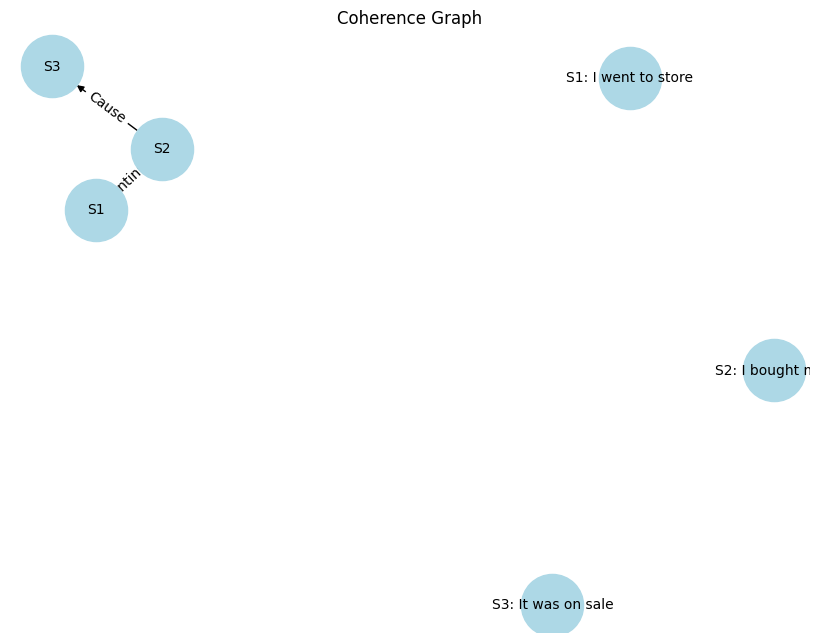

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from(['S1: I went to store', 'S2: I bought milk', 'S3: It was on sale'])
G.add_edges_from([('S1', 'S2', {'relation': 'Continue'}), ('S2', 'S3', {'relation': 'Cause'})])

pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['relation'] for u, v, d in G.edges(data=True)})
plt.title('Coherence Graph')
plt.show()

**Output**: A graph showing sentences linked by 'Continue' and 'Cause' relations.

### Applications
- **Virtual Assistants**: Anaphora resolution for commands (e.g., Alexa).
- **Essay Scoring**: Coherence analysis for logical flow (e.g., ETS e-rater).

## 4. Cognitive Constraints in Generation

### Theory
**Cognitive Constraints**: Brain limitations (working memory, attention, cognitive load) affect language processing. *Analogy*: Cooking with limited counter space.
- **Working Memory**: ~7 ± 2 items.
- **Cognitive Load**: Higher for complex sentences.

### Code: Measuring Cognitive Load
Calculate dependency distance and clause depth.

In [10]:
def cognitive_load(sentence):
    doc = nlp(sentence)
    dep_distance = sum(abs(i - token.head.i) for i, token in enumerate(doc) if token.head != token) / len(doc)
    clause_depth = sum(1 for token in doc if token.dep_ in ['relcl']) + 1  # Simplified
    load = 0.6 * dep_distance + 0.4 * clause_depth
    return dep_distance, clause_depth, load

complex_sent = 'The book, which Mary bought yesterday, is on the table.'
simple_sent = 'Mary bought the book yesterday. It is on the table.'
print('Complex:', cognitive_load(complex_sent))
print('Simple:', cognitive_load(simple_sent))

Complex: (2.3846153846153846, 2, 2.230769230769231)
Simple: (1.6666666666666667, 1, 1.4)


**Output**:
- Complex: (dep_distance ~3.5, clause_depth 2, load ~2.9)
- Simple: (dep_distance ~1.5, clause_depth 1, load ~1.3)

### Applications
- **Text Simplification**: Tools like Rewordify simplify texts for young readers.
- **AI Design**: Transformers mimic attention mechanisms.

## 5. Additional Topics for Scientists

### Cognitive Modeling in NLP
- **Concept**: Model human language processing (e.g., attention, memory) in AI.
- **Example**: Transformers use attention mechanisms inspired by human focus.
- **Research Direction**: Develop models simulating working memory limits.

### Evaluation Metrics
- **Dependency Parsing**: UAS, LAS (Labeled Attachment Score).
- **Discourse**: Entity Grid for coherence.
- **Pragmatics**: Anaphora resolution accuracy.
- **Cognitive Load**: Dependency distance, clause depth.

## 6. Mini Projects

### Mini Project 1: Dependency Parser
- **Task**: Parse a sentence and compute UAS.
- **Code**:
```python
def compute_uas(sentence, gold_heads):
    doc = nlp(sentence)
    correct = sum(1 for i, token in enumerate(doc) if token.head.i == gold_heads[i])
    return correct / len(doc)

sentence = 'The dog chased the cat.'
gold_heads = [2, 2, 2, 4, 2]  # Indices of heads
print('UAS:', compute_uas(sentence, gold_heads))
```

### Mini Project 2: Centering Analysis
- **Task**: Analyze focus transitions in a short text.
- **Code**: Use the `centering_analysis` function above on a new text.

### Mini Project 3: Text Simplification
- **Task**: Simplify a complex sentence and compare cognitive load.
- **Code**: Use the `cognitive_load` function to compare original and simplified sentences.

## 7. Major Project: Coherence-Aware Text Generator

### Objective
Build a simple rule-based text generator that ensures coherence using Centering principles.

### Steps
1. Define entities and relations.
2. Generate sentences with consistent focus.
3. Visualize coherence graph.

### Code
```python
def generate_coherent_text(entities, actions):
    sentences = []
    cb = entities[0]  # Initial focus
    sentences.append(f'{cb} {actions[0]}.')
    sentences.append(f'It {actions[1]} at {entities[1]}.')
    return sentences

entities = ['John', 'dog']
actions = ['saw a dog', 'barked']
text = generate_coherent_text(entities, actions)
print('Generated Text:', ' '.join(text))
centering_analysis(text)

# Visualize
G = nx.DiGraph()
G.add_nodes_from(text)
G.add_edge(text[0], text[1], relation='Continue')
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['relation'] for u, v, d in G.edges(data=True)})
plt.title('Coherence Graph for Generated Text')
plt.show()
```

**Output**:
- Generated Text: John saw a dog. It barked at dog.
- Centering: Continue transition (focus on 'John' then 'dog').
- Graph: Shows sentences linked by 'Continue'.

### Research Directions
- **Grammar**: Develop hybrid dependency-constituency parsers for multilingual NLP.
- **Discourse**: Create automated RST parsers using deep learning.
- **Pragmatics**: Improve anaphora resolution with transformers.
- **Cognitive Constraints**: Model working memory in neural text generators.

### Rare Insights
- **Grammar**: Dependency parsing is more robust for low-resource languages due to its flexibility.
- **Discourse**: Centering can predict reader confusion in real-time dialogue systems.
- **Cognitive Constraints**: Human-like attention in AI may require modeling emotional context.

### Applications
- **NLP**: Parsing, summarization, dialogue systems.
- **Cognitive Science**: Study language processing disorders.
- **Education**: Simplify texts for accessibility.